### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [90]:
import numpy as np
import pandas as pd

data = pd.read_csv('/Users/alikhansainov/Desktop/Karpov/processed_data_with_new_features.csv', index_col='id')

In [91]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [92]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

### Your code is here
print (data['passenger_count'].isna().sum())
print (data['distance_km'].isna().sum())


145864
145864


Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [93]:
### Your code is here
#  Заполнить самым популярным значением
#passenger_count_mean = data['passenger_count'].median()
#distance_km_mean = data['distance_km'].median()
popular_value = data['passenger_count'].value_counts().index[0]
popular_value
#print (np.round(passenger_count_mean, 2))
#print (np.round(distance_km_mean, 2))
data['passenger_count'].fillna(popular_value, inplace=True)
#data['distance_km'].fillna(distance_km_mean, inplace=True)


С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [94]:
### Your code is here

#similar_item

similar_item = data.groupby(['vendor_id','store_and_fwd_flag','traffic_jam','month_2','month_3','month_4','month_5','month_6'])['distance_km'].transform('mean')
data['distance_km'].fillna(similar_item, inplace=True)
result = data.head(20).to_csv('/Users/alikhansainov/Desktop/Karpov/processed_data_with_new_features copy.csv', sep=';', index=False)
data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,930.399753,0,1.226296,6.658011,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id2304944,1,930.399753,0,7.832952,6.639876,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
### Убедимся, что пропусков не осталось

### Your code is here
print (data['passenger_count'].isna().sum())
print (data['distance_km'].isna().sum())


0
0


### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [96]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

### Your code is here


X = data.drop('log_trip_duration', axis=1)
y = data['log_trip_duration']
model = LinearRegression()
model.fit(X,y)

cross_val_error = cross_validate(model, X, y, scoring ='neg_mean_squared_error', cv=selector, return_train_score=True)

#X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
np.mean(-cross_val_error['test_score'])

0.43091251677962517

<Axes: >

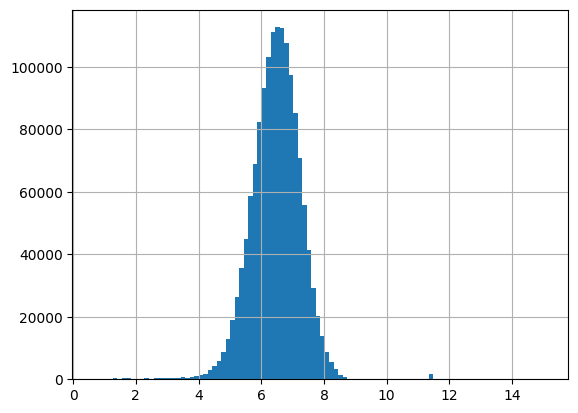

In [97]:
data['log_trip_duration'].hist(bins=100)

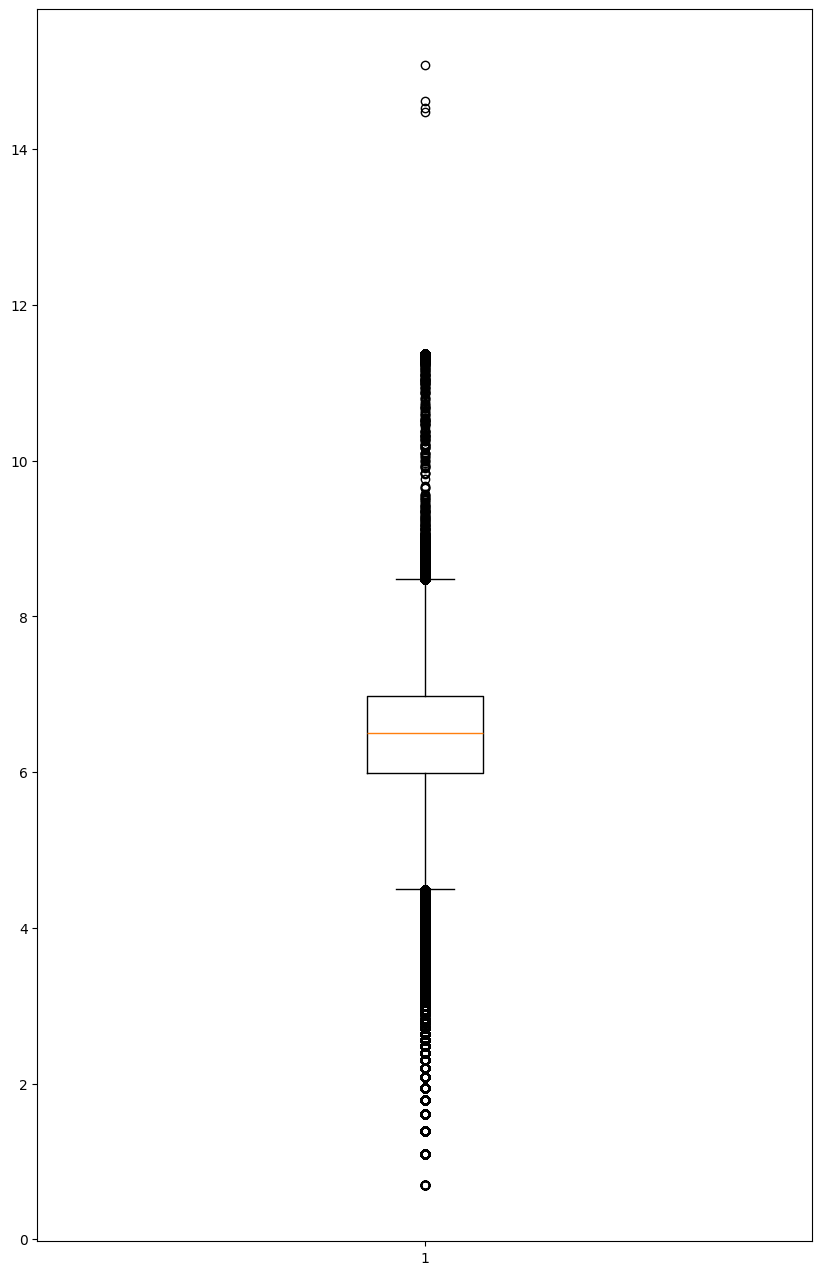

In [98]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches((10,16))
plt.boxplot(data['log_trip_duration'].values)
plt.show()

In [103]:
data.shape

(1458644, 41)

### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

In [106]:
import matplotlib.pyplot as plt

### Your code is here

q_low = data['log_trip_duration'].quantile(0.005)
q_high = data['log_trip_duration'].quantile(0.995)
# tentacle_length = q_high - q_low
# upper_tentacle = q_high + 2.45 * tentacle_length
# lower_tentacle = q_low - 2.45 * tentacle_length
filtered_data = data[(data['log_trip_duration'] < q_high) & (data['log_trip_duration'] > q_low )]
#filtered_data
selector = KFold(n_splits=4, shuffle=True, random_state=33)
X = filtered_data.drop('log_trip_duration', axis=1)
y = filtered_data['log_trip_duration']
model = LinearRegression()
model.fit(X,y)

cross_val_error = cross_validate(model, X, y, scoring ='neg_mean_squared_error', cv=selector, return_train_score=True)

#X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
np.mean(-cross_val_error['test_score'])


0.34959341398438093

In [104]:
filtered_data.shape

(1451280, 41)

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение;   топ 0,5% значение)

In [100]:
### Your code is here


Снова замерьте качество на кросс-валидации, используя старый selector

In [101]:
### Your code is here
